## Application of Convolutional Neural Networks for classification (CNNs/ConvNets) of MNIST dataset
The MNIST dataset is an acronym that stands for the Modified National Institute of Standards and Technology dataset.

It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.



The task is to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9, inclusively.

In fact, even Tensorflow and Keras allow us to import and download the MNIST dataset directly from their API. Therefore, we will start with the following two lines to import TensorFlow and MNIST dataset under the Keras API.

Importing the tensorflow and downoading dataset. 

In [3]:
# ignore warnings 
import warnings
warnings.simplefilter('ignore')

In [10]:
# Install and import tensorflow 
import tensorflow as tf

# Data Split
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

2


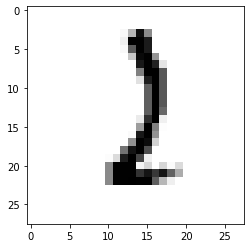

In [8]:
# Import plt
import matplotlib.pyplot as plt
# print a radom image 
image_index = 180 # You may select anything up to 60,000 80. 70
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

The shape of the dataset ;

In [11]:
x_train.shape

(60000, 28, 28)

### Reshaping and Normalizing the Images
To be able to use the dataset in Keras API, we need 4-dims NumPy arrays. However, as we see above, our array is 3-dims. In addition, we must normalize our data as it is always required in neural network models. We can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code). This can be done with the following code:

In [12]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32') # convert the data with #astype
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


### Building the Convolutional Neural Network
We will build our model by using high-level Keras API which uses either TensorFlow or Theano on the backend. There are several high-level TensorFlow APIs such as Layers, Keras, and Estimators which helps us create neural networks with high-level knowledge. However, this may lead to confusion since they all vary in their implementation structure. Therefore, if you see completely different codes for the same neural network although they all use TensorFlow, this is why. We will use the most straightforward API which is Keras. Therefore, I will import the Sequential Model from Keras and add Conv2D, MaxPooling, Flatten, Dropout, and Dense layers. I have already talked about Conv2D, Maxpooling, and Dense layers. In addition, Dropout layers fight with the overfitting by disregarding some of the neurons while training while Flatten layers flatten 2D arrays to 1D arrays before building the fully connected layers.

In [13]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2)) # Dropout is aimed to prevent the network form overfittings
model.add(Dense(10,activation=tf.nn.softmax)) # the number of final Dense layer is the number of output classes

2022-09-28 15:22:43.948866: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-28 15:22:43.948908: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-28 15:22:43.948935: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyter-3295): /proc/driver/nvidia/version does not exist
2022-09-28 15:22:43.949291: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


We may experiment with any number for the first Dense layer; however, the final Dense layer must have 10 neurons since we have 10 number classes (0, 1, 2, …, 9). You may always experiment with kernel size, pool size, activation functions, dropout rate, and a number of neurons in the first Dense layer to get a better result.

Compiling and Fitting the Model
With the above code, we created a non-optimized empty CNN. Now it is time to set an optimizer with a given loss function that uses a metric. Then, we can fit the model by using our train data. We will use the following code for these tasks:

In [14]:
# Compile model 
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2093 - accuracy: 0.9374
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0837 - accuracy: 0.9746
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0583 - accuracy: 0.9819
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0474 - accuracy: 0.9844
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0350 - accuracy: 0.9887
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0295 - accuracy: 0.9903
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0240 - accuracy: 0.9920
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0226 - accuracy: 0.9923
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0191 - accuracy: 0.9935
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.019

You can experiment with the optimizer, loss function, metrics, and epochs. However, I can say that adam optimizer is usually out-performs the other optimizers. I am not sure if you can actually change the loss function for multi-class classification. Feel free to experiment and comment below. The epoch number might seem a bit small. However, you will reach to 98–99% test accuracy. Since the MNIST dataset does not require heavy computing power, you may easily experiment with the epoch number as well.
Evaluating the Model

### Evaluating the Model

Finally, you may evaluate the trained model with x_test and y_test using one line of code:

In [15]:
# Evaluate model 
model.evaluate(x_test, y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.0582 - accuracy: 0.9858


[0.05820629373192787, 0.98580002784729]

We achieved 98.41% accuracy with such a basic model. To be frank, in many image classification cases (e.g. for autonomous cars), we cannot even tolerate 0.1% error since, as an analogy, it will cause 1 accident in 1000 cases. However, for our first model, I would say the result is still pretty good. We can also make individual predictions with the following cod

1/1 [==============================] - 0s 106ms/step
The prediction for the following image is:  9


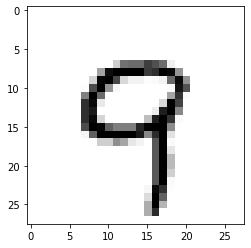

In [16]:
# try model on a random image 
image_index = 105
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print("The prediction for the following image is: ",pred.argmax())

Our model will classify the image as a ‘9’ and here is the visual of the image.



For further inofrmation above the topic please refer to a good reference :
#### Reference: 
https://cs231n.github.io/convolutional-networks/#conv

#### Damage sites in the microstructure of dual phase steel :
the damage sites are classified w.r.t the appearance in the microstructure and they are basically devided to 4 classes . out of which martensite cracks, interface decohisions, notchs are defomration induced damages and inclusions are not defoemration induced damages. 

<figure>
<img src="example.png" width='1000'>
<figcaption></figcaption>
</figure>


#### Damage sites in the microstructure of dual phase steel : 

What kind of multi-classe data do you have your field of research? Are you interested in thei classification and statistic extraction ? Refer to our papaers if you are like to know how we did it.;)

#### Reference: 
i) S. Medghalchi et al. Damage Analysis in Dual-Phase Steel Using Deep Learning: Transfer from Uniaxial to Biaxial Straining Conditions by Image Data Augmentation, JOM, 2020


ii) C. Kusche et al. Large-area, high-resolution characterisation and classification of damage mechanisms in dual-phase steel using deep learning. PloS one, 2019.
